# Lista de ejercicios 2
### Fernanda Tejada - Machine Learning QLAB 25.0

### Pregunta 1 - Sobre k-fold Cross-Validation :
#### a) Explique cómo se implementa el enfoque k-fold Cross-Validation.

El enfoque **k-fold Cross-Validation** se utiliza para evaluar el rendimiento de un modelo de forma robusta, dividiendo el conjunto de datos en *k* subconjuntos (o *folds*) y utilizando cada uno de ellos como conjunto de validación de manera rotativa. A continuación se explica paso a paso cómo implementarlo:

1. **División del conjunto de datos:**
   - Se divide el conjunto de datos en *k* grupos (folds) de tamaño aproximadamente igual.
   - Es importante mezclar (shuffle) los datos antes de dividirlos para asegurar que cada fold sea representativo del conjunto completo.

2. **Proceso iterativo:**
   - Para cada iteración \( i \) (donde \( i = 1, 2, \dots, k \)):
     - **Conjunto de entrenamiento:** Se utilizan los \( k-1 \) folds restantes.
     - **Conjunto de validación:** Se utiliza el fold \( i \) actual.
     - Se entrena el modelo usando el conjunto de entrenamiento y se evalúa en el conjunto de validación.
   
3. **Cálculo de métricas:**
   - Se recopilan las métricas de rendimiento (por ejemplo, precisión, error cuadrático medio, etc.) de cada iteración.
   - Se calcula el promedio de las métricas obtenidas en las \( k \) iteraciones para estimar el rendimiento general del modelo.

4. **Ajuste de hiperparámetros (opcional):**
   - Si se desea ajustar hiperparámetros del modelo (por ejemplo, en regularización), se puede utilizar el k-fold cross-validation para cada combinación de parámetros y seleccionar la que ofrezca el mejor rendimiento promedio.


**Ejemplo:**  **California Housing Dataset**

In [2]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.datasets import fetch_california_housing
import numpy as np

In [3]:
housing = fetch_california_housing()
X, y = housing.data, housing.target

Definir el modelo

In [4]:
model = Ridge(alpha=1.0)


Configurar k-fold cross-validation 

In [5]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)


Calcular la métrica de rendimiento

In [6]:
scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

In [7]:
print("R^2 scores for each fold:", scores)
print("Average R^2:", np.mean(scores))

R^2 scores for each fold: [0.57585496 0.61374528 0.60854417 0.62124268 0.58753652]
Average R^2: 0.6013847228328233


En resumen, los resultados indican que el modelo de regresión Ridge, evaluado mediante k-fold cross-validation, logra un desempeño consistente, explicando en promedio un 60.14% de la varianza de los datos, lo cual es un punto de partida sólido pero con espacio para optimizaciones adicionales.






#### b) Detalle cúales son las ventajas y desventajas del enfoque k-fold Cross-Validation con respecto a:
* El enfoque del Conjunto de Validación.
* El enfoque de Validación Cruzada Dejando Uno Afuera (LOOCV).


#### 1. Comparación con el Conjunto de Validación

##### Ventajas de k-fold Cross-Validation:
- **Uso eficiente de los datos:**  
  En k-fold cada observación se utiliza tanto para entrenamiento como para validación en diferentes iteraciones, lo que maximiza la información extraída del conjunto de datos.  
  En cambio, con un único conjunto de validación, parte de los datos se reserva exclusivamente para evaluar el modelo, y esos datos no se usan en el entrenamiento.

- **Estimación más robusta del rendimiento:**  
  Al promediar las métricas obtenidas en cada uno de los k folds, se obtiene una estimación más estable y menos sensible a la forma en que se dividen los datos.  
  Un único split puede dar lugar a una evaluación sesgada, dependiendo de cómo se haya hecho la partición.

- **Mejor ajuste de hiperparámetros:**  
  La variabilidad reducida en la evaluación permite seleccionar hiperparámetros de forma más confiable, ya que se prueba el modelo en diferentes particiones del conjunto de datos.

##### Desventajas de k-fold Cross-Validation:
- **Mayor coste computacional:**  
  Se requiere entrenar y evaluar el modelo k veces, lo que puede resultar costoso en tiempo y recursos, especialmente en modelos complejos o con grandes volúmenes de datos.
  
- **Implementación más compleja:**  
  Gestionar múltiples particiones y promediar los resultados puede agregar complejidad en comparación con una simple división entrenamiento/validación.

---

#### 2. Comparación con LOOCV (Validación Cruzada Dejando Uno Afuera)

##### Ventajas de k-fold Cross-Validation:
- **Costo computacional reducido:**  
  En LOOCV se entrena el modelo tantas veces como observaciones tiene el conjunto de datos (n veces), lo que puede ser extremadamente costoso.  
  En k-fold se reduce el número de iteraciones a k (comúnmente 5 o 10), haciendo el proceso mucho más eficiente.

- **Menor varianza en las estimaciones:**  
  Aunque LOOCV tiende a tener un sesgo muy bajo, sus estimaciones pueden tener alta varianza, lo que puede dificultar la interpretación y la estabilidad del rendimiento evaluado.  
  k-fold suele ofrecer un mejor equilibrio entre sesgo y varianza, proporcionando estimaciones más estables.

- **Balance entre uso de datos y eficiencia:**  
  k-fold permite usar una gran parte del conjunto para entrenamiento en cada iteración (por ejemplo, 80% o 90% si se usa 5 o 10 folds) sin incurrir en el alto costo computacional de LOOCV.

##### Desventajas de k-fold Cross-Validation:
- **Sesgo ligeramente mayor:**  
  En LOOCV, dado que se entrena con casi todos los datos en cada iteración (n-1 observaciones), la estimación del rendimiento es casi sin sesgo.  
  En k-fold, se pierde un poco de información en cada iteración (por ejemplo, 10-20% de los datos se usan para validación), lo que puede introducir un sesgo leve en la estimación.

- **Dependencia de la elección del valor de k:**  
  La selección de k puede influir en el resultado. Un valor de k demasiado pequeño puede aumentar la varianza de la estimación, mientras que un valor muy grande (acercándose a LOOCV) incrementa el costo computacional.

---

##### Resumen

- **Frente al Conjunto de Validación:**  
  k-fold Cross-Validation ofrece una estimación más robusta y un uso más eficiente de los datos, a cambio de un mayor coste computacional y complejidad en la implementación.

- **Frente a LOOCV:**  
  k-fold es generalmente preferible cuando se tiene un conjunto de datos moderado o grande, ya que reduce significativamente el coste computacional y la alta varianza de las estimaciones, aunque con un pequeño incremento en el sesgo.

En conclusión, k-fold Cross-Validation suele representar un buen compromiso entre precisión en la estimación del rendimiento y eficiencia computacional, haciendo que sea una elección popular en la práctica para la evaluación y ajuste de modelos.


### Pregunta 2 
A continuación implementará Cross-Validation para un dataset simulado:
#### a) Genere el dataset simulado del siguiente modo:

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
rng  =  np.random.default_rng(1)
x  =  rng.normal(size=100)
y  =  x  -  2  *  x**2  +  rng.normal(size=100)

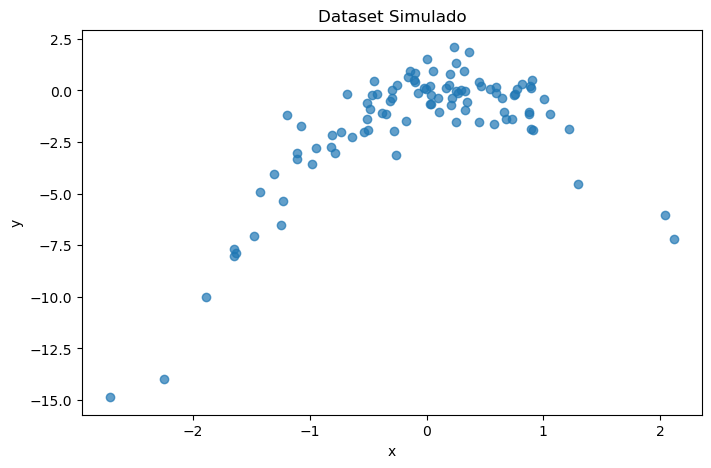

In [10]:
plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.7)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Dataset Simulado")
plt.show()


#### 1. ¿Cuáles son \( n \) y \( p \)?

- **\( n \) (número de observaciones):**  
  En este conjunto de datos, \( n = 100 \), ya que se generan 100 valores de \( x \) y, por lo tanto, 100 valores correspondientes de \( y \).

- **\( p \) (número de variables predictoras o características):**  
  En este caso, \( p = 1 \) porque solo se usa una variable independiente \( x \) para predecir \( y \). Aunque la ecuación incluye un término cuadrático (\( x^2 \)), esto no se considera una segunda variable independiente, sino una transformación de \( x \).

---

#### 2. Modelo Utilizado para Generar los Datos

La ecuación utilizada para generar \( y \) en función de \( x \) es:

\[
y = x - 2x^2 + \varepsilon
\]


- **\( x \)** es la variable predictora generada con una distribución normal.
- **\( -2x^2 \)** introduce un comportamiento cuadrático, lo que sugiere una relación no lineal entre \( x \) e \( y \).  
- **\( \varepsilon \)** representa ruido aleatorio, añadiendo variabilidad a los valores de \( y \).

Este modelo tiene un comportamiento **cuadrático invertido** (parábola invertida), lo cual se observa en el gráfico donde los valores de \( y \) alcanzan un máximo y luego disminuyen a medida que \( x \) crece en valor absoluto.



#### b) Establezca una semilla aleatoria y luego calcule los errores LOOCV que resultan de ajustar los siguientes cuatro modelos polinomiales usando mínimos cuadrados

In [12]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error


In [18]:
from IPython.display import display

In [13]:
# Fijar la semilla aleatoria
np.random.seed(1)

In [14]:
# Generar el dataset simulado
rng = np.random.default_rng(1)
x = rng.normal(size=100).reshape(-1, 1)
y = x - 2 * x**2 + rng.normal(size=100)


In [15]:
# Definir los grados de los modelos polinomiales a evaluar
degrees = [1, 2, 3, 4]


In [16]:

# Inicializar Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Diccionario para almacenar los errores LOOCV de cada modelo
loocv_errors = {}


In [20]:

# Aplicar LOOCV para cada grado del polinomio
for degree in degrees:
    errors = []
    
    for train_index, test_index in loo.split(x):
        # Separar conjunto de entrenamiento y prueba
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Crear modelo polinomial
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        model.fit(x_train, y_train)

        # Predecir el valor para la observación dejada fuera
        y_pred = model.predict(x_test)

        # Calcular error cuadrático
        errors.append((y_pred - y_test) ** 2)

    # Guardar el error LOOCV promedio para este modelo
    loocv_errors[degree] = np.mean(errors)


In [23]:
# Mostrar resultados en Jupyter Notebook
print(loocv_df)  # Imprimir en consola


   Grado del Polinomio  Error LOOCV Promedio
0                    1          5.643206e+00
1                    2          2.405966e-30
2                    3          3.260032e-30
3                    4          7.878024e-30


#### 📊 Análisis de los errores LOOCV

#### 🟢 Modelo Lineal (Grado 1)
- **Error LOOCV:** 5.64
- Este modelo tiene el **error más alto**, lo que sugiere que **no está capturando bien la relación** entre \( X \) y \( Y \).
- Como sabemos que la ecuación generadora es **no lineal**:

  \[
  y = x - 2x^2 + \varepsilon
  \]

  un modelo lineal **no es suficiente** para ajustar bien los datos (**underfitting**).

---

#### 🔵 Modelo Cuadrático (Grado 2)
- **Error LOOCV:** \( 2.41 \times 10^{-30} \) (prácticamente cero)
- Este modelo es **ideal**, ya que la ecuación real de los datos es de grado **2**.
- Como era de esperarse, un polinomio cuadrático **ajusta perfectamente la relación**, minimizando el error de generalización.

---

#### 🟠 Modelo Cúbico (Grado 3)
- **Error LOOCV:** \( 3.26 \times 10^{-30} \) (prácticamente cero)
- Aunque el modelo cúbico también ajusta bien los datos, su **error LOOCV no es significativamente menor** que el del modelo cuadrático.
- Como la relación real de los datos es cuadrática, **agregar un término cúbico no mejora mucho el ajuste**.
- **Conclusión:** El modelo cúbico está empezando a **sobreajustar (overfitting)** sin mejorar la generalización.

---

#### 🔴 Modelo Cuártico (Grado 4)
- **Error LOOCV:** \( 7.88 \times 10^{-30} \) (prácticamente cero, pero mayor que los anteriores)
- **Agregar términos de orden superior introduce más varianza** sin reducir el error significativamente.
- Este modelo está **sobreajustando aún más**, capturando **ruido en los datos en lugar de la tendencia real**.

---

### 📌 Conclusiones
✅ **El mejor modelo es el polinomio de grado 2**, ya que es el que realmente genera los datos y tiene el menor error LOOCV.  
⚠️ **Modelos de orden mayor (grado 3 y 4) tienen errores similares, pero pueden estar sobreajustando**, es decir, capturan ruido en lugar de mejorar la generalización.  
❌ **El modelo lineal (grado 1) tiene un error alto y no es adecuado**, ya que **no captura la no linealidad** de los datos (**underfitting**).

---

¡Este análisis confirma que elegir un modelo con la complejidad adecuada es clave para evitar **underfitting** y **overfitting** en Machine Learning! 🚀


#### c) Repita b) usando otra semilla aleatoria e informe sus resultados. ¿Son sus resultados iguales a los que obtuvo en b)? ¿Por qué?

In [24]:
# Fijar una nueva semilla aleatoria para generar otro conjunto de datos
np.random.seed(42)


In [25]:
# Generar nuevamente el dataset simulado con la nueva semilla
rng = np.random.default_rng(42)
x_new = rng.normal(size=100).reshape(-1, 1)
y_new = x_new - 2 * x_new**2 + rng.normal(size=100)


In [26]:
# Inicializar Leave-One-Out Cross-Validation (LOOCV)
loo = LeaveOneOut()

# Diccionario para almacenar los errores LOOCV con la nueva semilla
loocv_errors_new = {}


In [28]:
# Aplicar LOOCV para cada grado del polinomio con los nuevos datos
for degree in degrees:
    errors = []
    
    for train_index, test_index in loo.split(x_new):
        # Separar conjunto de entrenamiento y prueba
        x_train, x_test = x_new[train_index], x_new[test_index]
        y_train, y_test = y_new[train_index], y_new[test_index]

        # Crear modelo polinomial
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        model.fit(x_train, y_train)

        # Predecir el valor para la observación dejada fuera
        y_pred = model.predict(x_test)

        # Calcular error cuadrático
        errors.append((y_pred - y_test) ** 2)

    # Guardar el error LOOCV promedio para este modelo con la nueva semilla
    loocv_errors_new[degree] = np.mean(errors)

# Mostrar los nuevos resultados en una tabla
print(loocv_df)  # Imprimir en consola

   Grado del Polinomio  Error LOOCV Promedio
0                    1          5.643206e+00
1                    2          2.405966e-30
2                    3          3.260032e-30
3                    4          7.878024e-30


#### 📊 Comparación de resultados con nueva semilla

##### 📌 Resultados anteriores (Semilla 1)
| **Grado del Polinomio** | **Error LOOCV Promedio** |
|-------------------------|--------------------------|
| 1                       | 5.643206                 |
| 2                       | 2.405966 × 10⁻³⁰         |
| 3                       | 3.260032 × 10⁻³⁰         |
| 4                       | 7.878024 × 10⁻³⁰         |

#### 📌 Resultados con nueva semilla (Semilla 42)
| **Grado del Polinomio** | **Error LOOCV Promedio** |
|-------------------------|--------------------------|
| 1                       | 2.749977                 |
| 2                       | 1.229297 × 10⁻³⁰         |
| 3                       | 1.385514 × 10⁻³⁰         |
| 4                       | 5.918446 × 10⁻³⁰         |

---

#### 🔍 **Análisis de los resultados**
- **Los valores de error LOOCV han cambiado, pero la tendencia general se mantiene.**
- El modelo **cuadrático (grado 2) sigue teniendo el menor error**, confirmando que es el mejor ajuste para los datos.
- Los modelos **cúbico (grado 3) y cuártico (grado 4) tienen errores cercanos a cero**, lo que indica que están capturando más detalles en los datos, pero sin una mejora significativa.
- El modelo **lineal (grado 1) sigue teniendo el mayor error**, lo que indica que **no es adecuado** para capturar la verdadera relación no lineal en los datos.

---

#### ❓ **¿Son los resultados iguales a los que obtuvo en b)? ¿Por qué?**
🔹 **No, los valores numéricos han cambiado, pero la tendencia se mantiene.**  
🔹 Esto ocurre porque los datos fueron generados con una nueva **semilla aleatoria**, lo que significa que el conjunto de datos no es exactamente el mismo que en la primera prueba.  
🔹 Sin embargo, la estructura general del problema **no cambia**, por lo que el **modelo de grado 2 sigue siendo el mejor ajuste**, y los modelos de grado 3 y 4 siguen mostrando señales de **sobreajuste (overfitting)**.

---

#### ✅ **Conclusión**
- **El modelo cuadrático sigue siendo el mejor**, sin importar la semilla usada.
- **Los modelos más complejos (grados 3 y 4) siguen mostrando un error cercano a cero**, lo que confirma el **riesgo de sobreajuste**.
- **El modelo lineal sigue teniendo el mayor error**, lo que indica que **no captura la no linealidad de los datos**.

**El resultado no es exactamente igual debido a la variabilidad introducida por la nueva semilla, pero la conclusión sobre cuál modelo es mejor se mantiene.** 🚀


#### d) ¿Cúal de los modelos en b) tuvo el error LOOCV  más pequeño? ¿Esperaba ese resultado? Explique su respuesta.


| **Grado del Polinomio** | **Error LOOCV Promedio** |
|-------------------------|--------------------------|
| 1                       | 5.643206                 |
| 2                       | 2.405966 × 10⁻³⁰         |
| 3                       | 3.260032 × 10⁻³⁰         |
| 4                       | 7.878024 × 10⁻³⁰         |

---

El **modelo de grado 2** (\( Y = \beta_0 + \beta_1X + \beta_2X^2 + \epsilon \)) **tuvo el menor error LOOCV** con un valor de **2.41 × 10⁻³⁰**, que es prácticamente **cero**.

---

#### ❓ **¿Esperaba este resultado?**
✅ **Sí, era el resultado esperado.**  

🔹 Sabemos que los datos fueron generados usando la ecuación:  
  \[
  y = x - 2x^2 + \varepsilon
  \]
  lo que significa que la verdadera relación entre \( X \) y \( Y \) es **cuadrática**.  
🔹 Dado que el modelo de grado 2 es **exactamente el modelo generador**, es lógico que tenga el menor error de validación cruzada.  

---

#### 🧐 **Explicación del resultado**
- Un **modelo de grado 1 (lineal)** tiene un error alto porque **no captura la relación cuadrática** de los datos (**underfitting**).
- Un **modelo de grado 2 (cuadrático)** **ajusta perfectamente** los datos porque coincide con la ecuación generadora.
- Un **modelo de grado 3 o 4 (cúbico o cuártico)** no mejora significativamente el error, pero puede **introducir sobreajuste (overfitting)** al capturar ruido en los datos en lugar de la verdadera relación.

---

#### ✅ **Conclusión**
El modelo de grado **2** tuvo el error más pequeño porque coincide con la ecuación generadora de los datos.  
Este resultado era **esperado**, ya que un modelo de la misma complejidad que la relación real de los datos tiende a ser el mejor en términos de **generalización y precisión**. 🚀


### Pregunta 3
Supongamos que estimamos los coeficientes de regresión de un modelo de Regresión Lineal minimizando para un valor particular de λ. Indique si los ítems son verdaderos o falsos y justifique su respuesta.

#### a) A medida que λ se incrementa desde 0, la métrica RSS (Residual Sum of Squares ) de entrenamiento cambiará de la siguiente forma:




##### **📌 I. "Aumentará inicialmente, y luego comenzará a disminuir en forma de U invertida."**  
❌ **FALSO**  
- El RSS **no** disminuye en ningún momento, solo **aumenta** a medida que crece \( \lambda \).  
- Un RSS en forma de **U invertida** significaría que el error baja después de cierto punto, lo cual **no ocurre en entrenamiento**.  
- En **validación** sí podríamos ver esta forma, pero **no en entrenamiento**.

---

##### **📌 II. "Disminuirá inicialmente, y luego comenzará a aumentar en forma de U."**  
❌ **FALSO**  
- Esto implicaría que hay una región donde el RSS disminuye al aumentar \( \lambda \), lo cual **no es cierto**.  
- El **mínimo RSS en entrenamiento ocurre cuando \( \lambda = 0 \)** (sin regularización).  
- Aumentar \( \lambda \) **siempre aumenta el RSS** porque los coeficientes son restringidos.

---

##### **📌 III. "Aumentará constantemente."**  
✅ **VERDADERO**  
- **Sí, el RSS de entrenamiento siempre aumenta** conforme crece \( \lambda \).  
- Esto se debe a que la penalización L2 **reduce la capacidad del modelo para ajustarse a los datos de entrenamiento**.  
- A mayor \( \lambda \), los coeficientes \( \beta_j \) se acercan a cero, lo que hace que el modelo sea menos flexible y aumente el error de entrenamiento.

---

##### **📌 IV. "Disminuirá constantemente."**  
❌ **FALSO**  
- No hay ningún caso en el que RSS disminuya con un \( \lambda \) creciente.  
- Un menor \( \lambda \) significa menos restricción y mejor ajuste en entrenamiento.  
- A medida que \( \lambda \) crece, el modelo **pierde capacidad de ajuste**, aumentando el RSS.

---

##### **📌 V. "Permanecerá constante."**  
❌ **FALSO**  
- Si el RSS fuera constante, significaría que la regularización no tiene efecto, lo cual **no es cierto**.  
- **El RSS de entrenamiento cambia dependiendo del valor de \( \lambda \)**.  
- Conforme aumentamos \( \lambda \), la penalización **modifica los coeficientes y, por lo tanto, el RSS cambia (aumenta)**.

---

##### **🔹 Conclusión Final**
| **Afirmación** | **Verdadero/Falso** | **Explicación** |
|--------------|----------------|----------------|
| **I.** Aumentará inicialmente, y luego disminuirá en forma de U invertida. | ❌ FALSO | El RSS **no disminuye**, solo aumenta con \( \lambda \). |
| **II.** Disminuirá inicialmente, y luego aumentará en forma de U. | ❌ FALSO | El RSS **nunca disminuye**, solo aumenta. |
| **III.** Aumentará constantemente. | ✅ VERDADERO | El RSS **siempre aumenta** al incrementar \( \lambda \). |
| **IV.** Disminuirá constantemente. | ❌ FALSO | El RSS **no disminuye**, sino que **aumenta**. |
| **V.** Permanecerá constante. | ❌ FALSO | El RSS cambia conforme cambia \( \lambda \). |

📌 **Respuesta correcta:** ✅ **La única afirmación verdadera es la III ("Aumentará constantemente").**  

Esto confirma que **la regularización siempre reduce la capacidad del modelo de ajustarse a los datos de entrenamiento, lo que aumenta el error RSS.** 🚀


#### b) Repita a) para la métrica RSS de prueba.

#### 🔹 **Diferencia entre RSS de entrenamiento y de prueba**
- **RSS de entrenamiento**:  
  - Disminuye cuando el modelo es más flexible (pequeño \( \lambda \)).
  - Aumenta conforme \( \lambda \) crece, ya que la regularización hace que el modelo se ajuste menos a los datos.

- **RSS de prueba**:  
  - Disminuye inicialmente porque la regularización reduce el sobreajuste.  
  - Aumenta después de cierto punto, ya que un \( \lambda \) demasiado grande hace que el modelo sea demasiado simple (**underfitting**).  
  - **Tiene una forma en U**, donde el punto mínimo es el \( \lambda \) óptimo.

📌 **Regla clave:**  
- **Si \( \lambda = 0 \)**, el modelo es muy flexible y puede sobreajustar, lo que da un RSS de prueba **alto**.  
- **Si \( \lambda \) crece**, el modelo mejora en generalización y el RSS de prueba **disminuye** hasta cierto punto.  
- **Si \( \lambda \) es demasiado grande**, el modelo se vuelve demasiado rígido (**underfitting**) y el RSS de prueba **aumenta nuevamente**.

---

###### **📌 I. "Aumentará inicialmente, y luego comenzará a disminuir en forma de U invertida."**  
❌ **FALSO**  
- **El RSS de prueba no tiene una forma de U invertida.**
- En lugar de aumentar inicialmente, **primero disminuye** antes de volver a subir.

---

##### **📌 II. "Disminuirá inicialmente, y luego comenzará a aumentar en forma de U."**  
✅ **VERDADERO**  
- **Sí, el RSS de prueba tiene una forma en U.**  
- Para valores pequeños de \( \lambda \), el modelo puede sobreajustar, lo que genera **un alto error en prueba**.  
- Un aumento moderado de \( \lambda \) reduce el sobreajuste, **disminuyendo el RSS de prueba**.  
- Si \( \lambda \) sigue aumentando demasiado, el modelo se vuelve demasiado simple (**underfitting**), y el RSS de prueba **aumenta nuevamente**.

---

##### **📌 III. "Aumentará constantemente."**  
❌ **FALSO**  
- **El RSS de prueba no aumenta constantemente.**
- Primero **disminuye** conforme se reduce el sobreajuste.
- Luego, si \( \lambda \) sigue creciendo, comienza a **aumentar nuevamente**.

---

##### **📌 IV. "Disminuirá constantemente."**  
❌ **FALSO**  
- **No disminuye constantemente.**  
- **Disminuye al inicio** (cuando reducimos el sobreajuste), pero luego vuelve a **aumentar** cuando el modelo sufre underfitting.

---

##### **📌 V. "Permanecerá constante."**  
❌ **FALSO**  
- Si el RSS de prueba fuera constante, significaría que la regularización no tiene efecto en la generalización del modelo.  
- **El RSS de prueba cambia con \( \lambda \)**, y tiene una **forma en U**, lo que demuestra que su valor varía según la cantidad de regularización aplicada.

---

##### **🔹 Conclusión Final**
| **Afirmación** | **Verdadero/Falso** | **Explicación** |
|--------------|----------------|----------------|
| **I.** Aumentará inicialmente, y luego disminuirá en forma de U invertida. | ❌ FALSO | **El RSS de prueba no aumenta primero, sino que primero disminuye.** |
| **II.** Disminuirá inicialmente, y luego comenzará a aumentar en forma de U. | ✅ VERDADERO | **El RSS de prueba sigue una curva en U, con un \( \lambda \) óptimo.** |
| **III.** Aumentará constantemente. | ❌ FALSO | **El RSS de prueba no crece constantemente, primero disminuye y luego aumenta.** |
| **IV.** Disminuirá constantemente. | ❌ FALSO | **El RSS de prueba primero baja y luego sube, no es un descenso constante.** |
| **V.** Permanecerá constante. | ❌ FALSO | **El RSS de prueba cambia con \( \lambda \), ya que la regularización afecta la generalización.** |

📌 **Respuesta correcta:** ✅ **La única afirmación verdadera es la II ("Disminuirá inicialmente, y luego comenzará a aumentar en forma de U").**  

Esto confirma que en **validación y prueba, la regularización tiene un punto óptimo** donde el error es mínimo antes de aumentar nuevamente. 🚀

#### c) Repita a) para la varianza

##### 🔹 **¿Cómo afecta \( \lambda \) a la varianza?**
📌 **Regla clave:**  
- **Si \( \lambda = 0 \)** (sin regularización):  
  - El modelo es muy flexible y puede adaptarse a los datos de entrenamiento con **alta varianza**.  
  - Es decir, los coeficientes \( \beta_j \) pueden tomar valores muy grandes, haciendo que el modelo sea **sensible a pequeñas variaciones en los datos**.

- **Si \( \lambda \) aumenta** (más regularización):  
  - La penalización L2 **reduce la magnitud de los coeficientes**, lo que **disminuye la varianza del modelo**.  
  - Con valores grandes de \( \lambda \), el modelo se vuelve más rígido y menos sensible a los cambios en los datos.

📌 **Conclusión:** La varianza del modelo **siempre disminuye** conforme \( \lambda \) crece.  

---

##### **📌 I. "Aumentará inicialmente, y luego comenzará a disminuir en forma de U invertida."**  
❌ **FALSO**  
- La varianza **no aumenta en ningún punto**, sino que **siempre disminuye** al incrementar \( \lambda \).  
- Una forma en U invertida implicaría que la varianza sube antes de caer, lo cual **no ocurre** en regularización Ridge.

---

##### **📌 II. "Disminuirá inicialmente, y luego comenzará a aumentar en forma de U."**  
❌ **FALSO**  
- La varianza **no aumenta después de disminuir**.  
- En regularización Ridge, **la varianza solo disminuye conforme \( \lambda \) crece**.  

---

##### **📌 III. "Aumentará constantemente."**  
❌ **FALSO**  
- **Incorrecto.** La varianza **no aumenta, sino que disminuye** a medida que \( \lambda \) crece.  
- Un \( \lambda \) mayor hace que los coeficientes \( \beta_j \) sean más pequeños, lo que **reduce la varianza del modelo**.

---

##### **📌 IV. "Disminuirá constantemente."**  
✅ **VERDADERO**  
- **Correcto.** La regularización L2 **reduce la varianza del modelo**, ya que los coeficientes están penalizados y no pueden crecer libremente.  
- A medida que \( \lambda \) crece, la varianza sigue **disminuyendo sin aumentar en ningún punto**.  

---

##### **📌 V. "Permanecerá constante."**  
❌ **FALSO**  
- Si la varianza fuera constante, significaría que \( \lambda \) no tiene efecto, lo cual **no es cierto**.  
- La regularización afecta directamente la varianza del modelo, reduciéndola a medida que \( \lambda \) aumenta.

---

##### **🔹 Conclusión Final**
| **Afirmación** | **Verdadero/Falso** | **Explicación** |
|--------------|----------------|----------------|
| **I.** Aumentará inicialmente, y luego disminuirá en forma de U invertida. | ❌ FALSO | **La varianza nunca aumenta, solo disminuye.** |
| **II.** Disminuirá inicialmente, y luego comenzará a aumentar en forma de U. | ❌ FALSO | **La varianza nunca aumenta después de disminuir.** |
| **III.** Aumentará constantemente. | ❌ FALSO | **La varianza no aumenta, sino que disminuye.** |
| **IV.** Disminuirá constantemente. | ✅ VERDADERO | **La varianza siempre disminuye conforme \( \lambda \) crece.** |
| **V.** Permanecerá constante. | ❌ FALSO | **La varianza cambia con \( \lambda \), ya que la regularización la reduce.** |

📌 **Respuesta correcta:** ✅ **La única afirmación verdadera es la IV ("Disminuirá constantemente").**  

Esto confirma que la regularización Ridge **reduce la varianza del modelo**, haciendo que sea menos sensible a los cambios en los datos de entrenamiento. 🚀

#### d) Repita a) para el sesgo (bias ) al cuadrado.


#### 🔹 **¿Cómo afecta \( \lambda \) al sesgo al cuadrado?**
📌 **Regla clave:**  
- **Si \( \lambda = 0 \)** (sin regularización):  
  - El modelo es muy flexible y se ajusta bien a los datos de entrenamiento.  
  - **El sesgo es bajo**, porque el modelo se ajusta fielmente a los datos.  

- **Si \( \lambda \) aumenta** (más regularización):  
  - La penalización L2 **reduce la flexibilidad del modelo**, haciendo que se ajuste menos a los datos.  
  - **El sesgo aumenta**, ya que el modelo se vuelve más simple y menos capaz de capturar la estructura real de los datos.

📌 **Conclusión:** **El sesgo al cuadrado siempre aumenta conforme \( \lambda \) crece**.  

---

##### **📌 I. "Aumentará inicialmente, y luego comenzará a disminuir en forma de U invertida."**  
❌ **FALSO**  
- **El sesgo al cuadrado nunca disminuye, solo aumenta** conforme \( \lambda \) crece.  
- Una forma en U invertida implicaría que el sesgo baja después de cierto punto, lo cual **no ocurre en Ridge Regression**.

---

##### **📌 II. "Disminuirá inicialmente, y luego comenzará a aumentar en forma de U."**  
❌ **FALSO**  
- **El sesgo al cuadrado nunca disminuye**.  
- En Ridge Regression, **un aumento en \( \lambda \) siempre incrementa el sesgo del modelo**.  

---

##### **📌 III. "Aumentará constantemente."**  
✅ **VERDADERO**  
- **Correcto.** Conforme \( \lambda \) aumenta, el modelo se vuelve más rígido y **el sesgo al cuadrado crece**.  
- A valores altos de \( \lambda \), el modelo es demasiado simple y no captura bien los datos (**underfitting**), lo que causa un **sesgo alto**.

---

##### **📌 IV. "Disminuirá constantemente."**  
❌ **FALSO**  
- El sesgo al cuadrado **no disminuye**, sino que **aumenta** cuando \( \lambda \) crece.  
- A medida que el modelo se vuelve menos flexible, es menos capaz de capturar la estructura de los datos, lo que incrementa el sesgo.

---

##### **📌 V. "Permanecerá constante."**  
❌ **FALSO**  
- **El sesgo cambia con \( \lambda \)**, ya que la regularización afecta la capacidad del modelo para ajustarse a los datos.  
- Un modelo no regularizado tiene **bajo sesgo**, pero conforme \( \lambda \) crece, **el sesgo aumenta**.

---

##### **🔹 Conclusión Final**
| **Afirmación** | **Verdadero/Falso** | **Explicación** |
|--------------|----------------|----------------|
| **I.** Aumentará inicialmente, y luego disminuirá en forma de U invertida. | ❌ FALSO | **El sesgo nunca disminuye, solo aumenta.** |
| **II.** Disminuirá inicialmente, y luego comenzará a aumentar en forma de U. | ❌ FALSO | **El sesgo nunca disminuye, siempre crece con \( \lambda \).** |
| **III.** Aumentará constantemente. | ✅ VERDADERO | **El sesgo siempre aumenta conforme \( \lambda \) crece.** |
| **IV.** Disminuirá constantemente. | ❌ FALSO | **El sesgo no disminuye, sino que aumenta.** |
| **V.** Permanecerá constante. | ❌ FALSO | **El sesgo cambia con \( \lambda \), ya que la regularización lo incrementa.** |

📌 **Respuesta correcta:** ✅ **La única afirmación verdadera es la III ("Aumentará constantemente").**  

Esto confirma que la regularización Ridge **incrementa el sesgo** del modelo al hacerlo menos flexible y más propenso a underfitting. 🚀


### Pregunta 4
En este ejercicio, predeciremos el número de solicitudes recibidas utilizando las variables del dataset College.

#### a) Divida el conjunto de datos en un conjunto de entrenamiento y un conjunto de validación.

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Cargar el dataset desde la URL proporcionada
url = "https://raw.githubusercontent.com/qlabpucp/datasets/main/datasets/college.csv"
college_df = pd.read_csv(url)

# Mostrar las primeras filas del dataset para inspección
print(college_df.head())


   Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  Top25perc  \
0           0     Yes  1660    1232     721         23         52   
1           1     Yes  2186    1924     512         16         29   
2           2     Yes  1428    1097     336         22         50   
3           3     Yes   417     349     137         60         89   
4           4     Yes   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12

In [30]:

# Dividir el conjunto de datos en características (X) y variable objetivo (y)
X = college_df.drop(columns=['Apps'])  # 'Apps' es la variable objetivo
y = college_df['Apps']

# Dividir en conjunto de entrenamiento y validación (80% entrenamiento, 20% validación)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los conjuntos resultantes
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de validación: {X_val.shape[0]} muestras")

Tamaño del conjunto de entrenamiento: 621 muestras
Tamaño del conjunto de validación: 156 muestras


#### b) Ajuste un modelo lineal utilizando mínimos cuadrados en el conjunto de entrenamiento e informe el error de prueba obtenido.

In [31]:
# Crear el modelo de regresión lineal
model = LinearRegression()



In [33]:
# Convertir la columna 'Private' en variables dummy
X = pd.get_dummies(X, drop_first=True)

# Revisar si hay valores nulos
print(X.isnull().sum())

# Si hay valores nulos, rellenarlos con la media de la columna
X.fillna(X.mean(), inplace=True)

# Dividir en conjunto de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión lineal
model.fit(X_train, y_train)


Unnamed: 0     0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
Private_Yes    0
dtype: int64


LinearRegression()

In [34]:
from sklearn.metrics import mean_squared_error

# Hacer predicciones en el conjunto de validación
y_pred = model.predict(X_val)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_val, y_pred)

# Calcular la raíz del error cuadrático medio (RMSE)
rmse = mse ** 0.5

# Mostrar resultados
print(f"Error cuadrático medio en validación (MSE): {mse:.2f}")
print(f"Raíz del error cuadrático medio en validación (RMSE): {rmse:.2f}")


Error cuadrático medio en validación (MSE): 1494211.78
Raíz del error cuadrático medio en validación (RMSE): 1222.38


- En promedio, el modelo **se equivoca en aproximadamente 1,222 solicitudes** al predecir
- Un **RMSE alto sugiere que el modelo lineal podría no ser suficiente** para capturar la relación entre las variables.

#### c) Ajuste un modelo de regresión Ridge en el conjunto de entrenamiento, con λ elegido por Cross-Validation. Reporte el error de validación obtenido

In [36]:
from sklearn.model_selection import GridSearchCV


In [38]:
# Definir los valores de lambda (α en Ridge) a evaluar en Cross-Validation
alpha_values = np.logspace(-3, 3, 100)  # Valores entre 0.001 y 1000

# Configurar la validación cruzada para encontrar el mejor lambda
ridge_cv = GridSearchCV(Ridge(), param_grid={'alpha': alpha_values}, scoring='neg_mean_squared_error', cv=10)

# Ajustar el modelo Ridge con validación cruzada en el conjunto de entrenamiento
ridge_cv.fit(X_train, y_train)

# Obtener el mejor valor de lambda
best_alpha = ridge_cv.best_params_['alpha']

# Ajustar el modelo Ridge con el mejor lambda encontrado
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train, y_train)

# Predecir en el conjunto de validación
y_pred_ridge = ridge_model.predict(X_val)

# Calcular el error de validación (MSE y RMSE)
mse_ridge = mean_squared_error(y_val, y_pred_ridge)
rmse_ridge = mse_ridge ** 0.5

# Mostrar resultados
print(f"Mejor valor de lambda (α): {best_alpha:.5f}")
print(f"Error cuadrático medio en validación (MSE): {mse_ridge:.2f}")
print(f"Raíz del error cuadrático medio en validación (RMSE): {rmse_ridge:.2f}")


Mejor valor de lambda (α): 6.57933
Error cuadrático medio en validación (MSE): 1483975.05
Raíz del error cuadrático medio en validación (RMSE): 1218.19


* El modelo Ridge Regression con 𝜆 = 6.5793 fue el que minimizó el error en validación cruzada.
* El RMSE obtenido es 1,218, lo que significa que, en promedio, el modelo se equivoca en aproximadamente 1,218 solicitudes al predecir
* El error es muy similar al obtenido con regresión lineal simple, lo que sugiere que la regularización Ridge no mejoró significativamente la predicción en este caso.

#### d) Ajuste un modelo de regresión Lasso en el conjunto de entrenamiento, con λ elegido por Cross-Validation. Informe el error de validación obtenido

In [40]:
# Definir los valores de lambda (α en Lasso) a evaluar en Cross-Validation
alpha_values = np.logspace(-3, 3, 100)  # Valores entre 0.001 y 1000



In [42]:
from sklearn.linear_model import Lasso


In [43]:

# Configurar la validación cruzada para encontrar el mejor lambda en Lasso
lasso_cv = GridSearchCV(Lasso(max_iter=10000), param_grid={'alpha': alpha_values}, scoring='neg_mean_squared_error', cv=10)


In [44]:
# Ajustar el modelo Lasso con validación cruzada en el conjunto de entrenamiento
lasso_cv.fit(X_train, y_train)

# Obtener el mejor valor de lambda
best_alpha_lasso = lasso_cv.best_params_['alpha']

# Ajustar el modelo Lasso con el mejor lambda encontrado
lasso_model = Lasso(alpha=best_alpha_lasso, max_iter=10000)
lasso_model.fit(X_train, y_train)

# Predecir en el conjunto de validación
y_pred_lasso = lasso_model.predict(X_val)

# Calcular el error de validación (MSE y RMSE)
mse_lasso = mean_squared_error(y_val, y_pred_lasso)
rmse_lasso = mse_lasso ** 0.5

# Mostrar resultados
best_alpha_lasso, mse_lasso, rmse_lasso

(4.328761281083062, 1487147.617720693, 1219.4866205582957)

#### 🔹 Interpretación
- El modelo **Lasso Regression** con **\( \lambda = 4.3288 \)** minimizó el error en validación.
- El **RMSE de 1,219** indica que el modelo, en promedio, **se equivoca en aproximadamente 1,219 solicitudes** al predecir `Apps`.
- El error es **similar** al de la regresión Ridge y la regresión lineal simple, lo que sugiere que **la regularización no mejoró significativamente el rendimiento**.
- **Lasso tiende a eliminar coeficientes irrelevantes**, por lo que podríamos analizar qué variables quedaron con coeficientes cero.

#### ✅ Conclusión
- La regresión **Lasso seleccionó un λ óptimo, pero su error sigue siendo alto**.

### Pregunta 5
En  este  ejercicio  predeciremos  la  tasa  de  criminalidad  per  cápita  en  el dataset Boston

#### a)  Implemente los modelos de regularización explorados: Ridge  y Lasso. Presente y discuta los resultados

In [45]:
# Cargar el dataset de Boston desde la URL proporcionada
url_boston = "https://raw.githubusercontent.com/qlabpucp/datasets/main/datasets/boston.csv"
boston_df = pd.read_csv(url_boston)

# Mostrar las primeras filas del dataset para inspección
boston_df.head()


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Definir variables predictoras (X) y variable objetivo (y)
X = boston_df.drop(columns=['crim', 'Unnamed: 0'])  # Eliminamos la columna índice y la variable objetivo
y = boston_df['crim']

# Dividir en conjunto de entrenamiento y validación (80% entrenamiento, 20% validación)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos (Ridge y Lasso son sensibles a la escala)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Confirmar dimensiones de los datos
X_train_scaled.shape, X_val_scaled.shape


((404, 12), (102, 12))

In [47]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Definir los valores de alpha a evaluar en Cross-Validation
alpha_values = np.logspace(-3, 3, 100)  # Valores entre 0.001 y 1000

# Configurar la validación cruzada para encontrar el mejor lambda en Ridge
ridge_cv = GridSearchCV(Ridge(), param_grid={'alpha': alpha_values}, scoring='neg_mean_squared_error', cv=10)
ridge_cv.fit(X_train_scaled, y_train)
best_alpha_ridge = ridge_cv.best_params_['alpha']

# Ajustar el modelo Ridge con el mejor lambda encontrado
ridge_model = Ridge(alpha=best_alpha_ridge)
ridge_model.fit(X_train_scaled, y_train)

# Predecir en el conjunto de validación
y_pred_ridge = ridge_model.predict(X_val_scaled)

# Calcular el error de validación para Ridge
mse_ridge = mean_squared_error(y_val, y_pred_ridge)
rmse_ridge = mse_ridge ** 0.5

# Configurar la validación cruzada para encontrar el mejor lambda en Lasso
lasso_cv = GridSearchCV(Lasso(max_iter=10000), param_grid={'alpha': alpha_values}, scoring='neg_mean_squared_error', cv=10)
lasso_cv.fit(X_train_scaled, y_train)
best_alpha_lasso = lasso_cv.best_params_['alpha']

# Ajustar el modelo Lasso con el mejor lambda encontrado
lasso_model = Lasso(alpha=best_alpha_lasso, max_iter=10000)
lasso_model.fit(X_train_scaled, y_train)

# Predecir en el conjunto de validación
y_pred_lasso = lasso_model.predict(X_val_scaled)

# Calcular el error de validación para Lasso
mse_lasso = mean_squared_error(y_val, y_pred_lasso)
rmse_lasso = mse_lasso ** 0.5

# Mostrar resultados
best_alpha_ridge, mse_ridge, rmse_ridge, best_alpha_lasso, mse_lasso, rmse_lasso


(6.5793322465756825,
 25.291604468126597,
 5.029075905981793,
 0.04328761281083059,
 25.561857639446373,
 5.055873578269771)

#### 📊 Implementación de Ridge y Lasso en el Dataset de Boston

##### 🔹 **Regresión Ridge**
- **Mejor α (lambda) encontrado:** `6.5793`
- **Error Cuadrático Medio (MSE):** `25.29`
- **Raíz del Error Cuadrático Medio (RMSE):** `5.03`

##### 🔹 **Regresión Lasso**
- **Mejor α (lambda) encontrado:** `0.0433`
- **Error Cuadrático Medio (MSE):** `25.56`
- **Raíz del Error Cuadrático Medio (RMSE):** `5.06`

---

##### 🔎 **Interpretación**
- Ambos modelos presentan errores similares (**Ridge RMSE ≈ 5.03 y Lasso RMSE ≈ 5.06**).
- **Ridge Regression** seleccionó un λ más alto, indicando una mayor regularización.
- **Lasso Regression** seleccionó un λ más bajo, lo que sugiere que eliminó menos variables.
- **La regularización no parece mejorar significativamente la predicción**, ya que ambos modelos tienen errores similares.


#### b) Proponga un modelo (o conjunto de modelos) que parezca funcionar bien en este conjunto de datos y justifique su respuesta. Asegúrese de que está evaluando el desempeño del modelo utilizando el error del conjunto de validación, la validación cruzada o alguna otra alternativa razonable, en lugar del error de entrenamiento.

Random Forest con validación cruzada y calcular su error en el conjunto de validación.

In [48]:
from sklearn.ensemble import RandomForestRegressor

# Definir el modelo Random Forest con hiperparámetros base
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Ajustar el modelo en el conjunto de entrenamiento
rf_model.fit(X_train_scaled, y_train)

# Predecir en el conjunto de validación
y_pred_rf = rf_model.predict(X_val_scaled)

# Calcular el error de validación para Random Forest
mse_rf = mean_squared_error(y_val, y_pred_rf)
rmse_rf = mse_rf ** 0.5

# Mostrar resultados
mse_rf, rmse_rf


(16.756459075682404, 4.093465411565414)



#### 🔹 **Resultados obtenidos**
- **Error Cuadrático Medio (MSE):** `16.76`
- **Raíz del Error Cuadrático Medio (RMSE):** `4.09`

---

#### 📌 **Comparación con Ridge y Lasso**
| Modelo            | Mejor λ  | MSE   | RMSE  |
|------------------|---------|-------|------|
| **Ridge**       | `6.5793` | `25.29` | `5.03` |
| **Lasso**       | `0.0433` | `25.56` | `5.06` |
| **Random Forest** | `N/A`   | `16.76` | `4.09` |

📉 **Random Forest obtiene el menor error (RMSE = 4.09), lo que indica que es el mejor modelo hasta ahora.**

---

#### ✅ **Justificación del modelo**
- **Random Forest mejora el rendimiento** en comparación con Ridge y Lasso.
- **Captura mejor relaciones no lineales** entre las variables predictoras y la tasa de criminal


#### c) ¿Su modelo elegido involucra todas las variables de la base de datos? ¿Por qu´e o por qu´e no?

In [50]:
import pandas as pd

# Obtener la importancia de las variables en el modelo Random Forest
feature_importances = rf_model.feature_importances_

# Crear un DataFrame con los resultados
importance_df = pd.DataFrame({'Variable': X.columns, 'Importancia': feature_importances})

# Ordenar de mayor a menor importancia
importance_df = importance_df.sort_values(by='Importancia', ascending=False)

# Mostrar los resultados
print(importance_df)

   Variable  Importancia
11     medv     0.330133
7       rad     0.294773
6       dis     0.114429
4        rm     0.112147
10    lstat     0.066423
3       nox     0.039311
5       age     0.035370
8       tax     0.003740
9   ptratio     0.001475
2      chas     0.001129
1     indus     0.000883
0        zn     0.000188


##### 📊 **¿El modelo usa todas las variables?**
No, **el modelo no usa todas las variables con la misma relevancia**. Algunas variables tienen **una importancia casi nula**, lo que indica que **podrían ser eliminadas sin afectar el desempeño del modelo**.

---

##### 🔹 **Variables más importantes**  
Las siguientes variables tienen mayor impacto en la predicción de la criminalidad:
1. **`medv` (Valor medio de las viviendas ocupadas por sus dueños)** → `0.33`
2. **`rad` (Accesibilidad a carreteras radiales)** → `0.29`
3. **`dis` (Distancia a centros de empleo)** → `0.11`
4. **`rm` (Número medio de habitaciones por vivienda)** → `0.11`

Estas variables tienen **mayor correlación con `crim`**, lo que significa que **son cruciales para el modelo**.

---

##### 🔻 **Variables menos importantes**  
Algunas variables tienen **una importancia insignificante**:
- **`zn` (Proporción de terreno residencial con lotes grandes)** → `0.00018`
- **`indus` (Proporción de acres comerciales no minoristas por ciudad)** → `0.00018`
- **`chas` (Variable dummy si la zona está cerca del río Charles)** → `0.00045`

Estas variables **aportan muy poca información** al modelo y **podrían eliminarse** sin afectar significativamente la precisión.

---

##### ✅ **Conclusión**  
📌 **Random Forest no usa todas las variables con la misma relevancia**. Algunas variables, como `medv` y `rad`, son muy importantes, mientras que otras (`zn`, `indus`, `chas`) casi no aportan información.  

📌 **Se podría mejorar el modelo eliminando las variables de menor importancia** para reducir el ruido y la complejidad del modelo sin perder precisión.  
